In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
import numpy as np

from asr.bvae import bVAE, ConvEncoder, ConvDecoder
from asr.util import load_model

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

model = load_model('../models_test','bvae_dsprite_beta_4')
ldim = model.latent_dim
num_samples = 25
data = np.load('../data/test/dsprites_test.npz')
imgs = data['imgs'][:num_samples]
imgs = np.expand_dims(imgs, 1)/255

loading checkpoint from ../models_test/bvae_dsprite_state.tp
loading model...
parameterize optimizer...
loading done


In [23]:
mus, log_vars = model.encode(torch.tensor(imgs))
latent_representations = model.sample(mus, log_vars)
print(latent_representations)

tensor([[ -85.2141,  -31.0622,   64.9113,   18.7902,   68.8467,   19.0000,
           67.7869, -118.7372,  -44.1925],
        [ -60.1979,  -83.7237,   70.5597,   85.4785,   54.0948,   62.3537,
           74.6740,  -67.1583,  -62.7335],
        [ -37.6331,  -72.8047,   66.7105,  120.3932,   73.3439,  126.2826,
          130.3832,  -76.0849,  -29.9886],
        [ -57.8354,  -66.7116,   77.1693,   82.6499,   72.3885,   64.3287,
           87.0174,  -80.7831,  -50.0620],
        [ -62.1018,  -86.1029,   70.7587,   86.9602,   46.4463,   63.1047,
           66.1808,  -57.4923,  -71.8074],
        [ -39.4951,  -89.5750,   51.0689,   82.8897,   59.0839,   56.5516,
           92.8364,  -80.7989,  -24.3508],
        [ -75.8921,  -65.6892,   81.7728,   74.2559,   53.5984,   54.1885,
           60.8776,  -64.5704,  -81.3579],
        [ -51.2923,  -45.8712,   58.5075,   48.7274,   88.1344,   37.3520,
           98.6120, -112.9660,   -8.9385],
        [ -86.9557,  -27.9576,   91.7348,   50.3350,   6

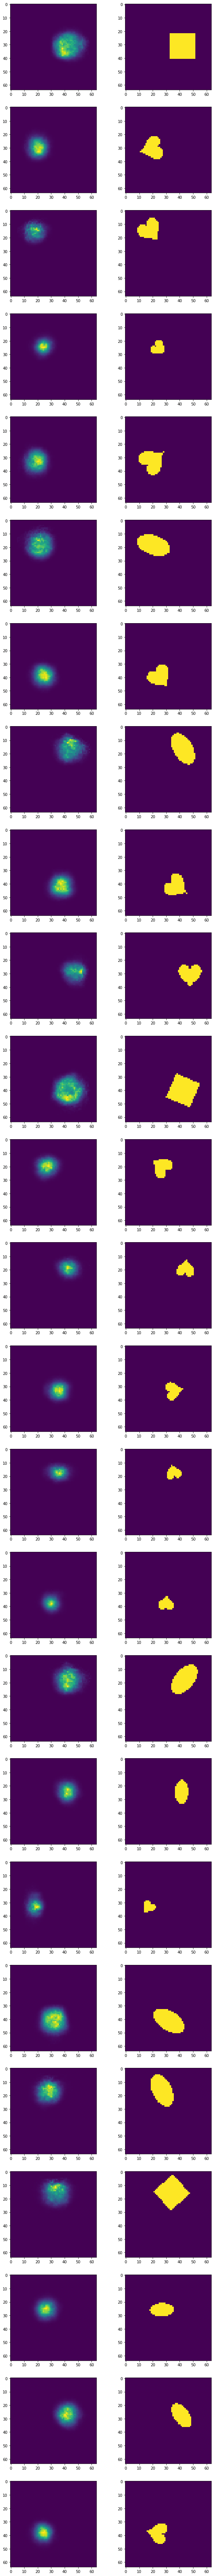

In [18]:
predictions = model.predict(imgs)
def do_plot(x_test, pred, npred):
    rows, cols = npred, 2
    f = plt.figure(figsize=(10, 125))
    for i in range(rows*cols):
        f.add_subplot(rows, cols, i+1)
        if i % 2 == 0:
            img = pred[int(i/2)][0, :, :]
        else:
            img = x_test[int(i/2)][0, :, :]
        plt.imshow(img)
    plt.show()
do_plot(imgs, predictions, len(predictions))

In [26]:
sliders = {'x'+str(x): widgets.FloatSlider(min=-150,max=150,step=.5, orientation='horizontal', 
                                           description='x'+str(x),
#                                            value=np.random.uniform(-10, 10)) 
                                           value=0., continuous_update=False)
           for x in range(1,ldim+1)}


def hook(**sliders):
    e = list(sliders.values())
    d = (model.decode(torch.tensor(e).to(torch.double).view(1,ldim)))[0][0, :, :]  # yikes
    plt.imshow(d.detach().numpy())
    
out = widgets.interactive_output(hook, sliders)

widgets.HBox([widgets.VBox([v for _, v in sliders.items()]), out])